MACHINE LEARNING II ASSIGNMENT - AS2015307 

In [33]:
import tensorflow
import keras
import numpy as np
import pandas as pd
import scipy
import sklearn

In [34]:
from scipy.io import arff
from numpy import array
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
le = preprocessing.LabelEncoder()

In [35]:
data = arff.loadarff('EEG_Eye_State.arff')
df = pd.DataFrame(data[0])
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'



### 1.PREPROCESSING

In [36]:
X = df.iloc[:,0:14] #assign attributes
Y = df.iloc[:,14:15] #eye detection
X = X.dropna()
Y = Y.dropna()


Label Encording Y

In [68]:
#converting Y to an array
Yarray = np.array(Y, dtype = object)

In [69]:
#fit labels 

le.fit([ b'0', b'1'])

LabelEncoder()

In [70]:
labeledY=le.transform(Yarray)

In [71]:
labeledY

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
#reshape Y
Y_reshaped=labeledY.reshape(1, -1)
Y_reshaped

array([[0, 0, 0, ..., 1, 1, 1]])

Scalling data

In [42]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmaxX = minmax_scaler.fit_transform(X)

In [43]:
#print scalled data
data_minmaxX

array([[0.01070233, 0.23693115, 0.55632642, ..., 0.42628583, 0.02988565,
        0.00423733],
       [0.01068737, 0.2360043 , 0.55711744, ..., 0.42607085, 0.02986542,
        0.00422368],
       [0.01069733, 0.23641646, 0.55737941, ..., 0.42661041, 0.02983848,
        0.00423086],
       ...,
       [0.01053429, 0.23321974, 0.54903938, ..., 0.42153096, 0.02959587,
        0.00416125],
       [0.01055758, 0.23342481, 0.5498287 , ..., 0.42347632, 0.02962622,
        0.00417703],
       [0.01056755, 0.23456075, 0.55132172, ..., 0.42498962, 0.02963634,
        0.00417703]])

1.2 Normalizing

In [44]:
#data normalizing using L1 - Least Absolute Deviations - sum of absolute values (on each row) = 1; it is insensitive to outliers
X  =  preprocessing .normalize(data_minmaxX, norm='l1')
X


array([[0.00412865, 0.09140126, 0.21461481, ..., 0.16444887, 0.01152903,
        0.00163464],
       [0.00413327, 0.09127306, 0.21546138, ..., 0.16478   , 0.01155025,
        0.00163348],
       [0.00414424, 0.09158984, 0.21593375, ..., 0.16527267, 0.01155969,
        0.00163907],
       ...,
       [0.00413776, 0.09160638, 0.21565718, ..., 0.16557315, 0.01162496,
        0.0016345 ],
       [0.00413372, 0.09139529, 0.21528025, ..., 0.16580817, 0.01159987,
        0.00163548],
       [0.00412221, 0.09149796, 0.21506076, ..., 0.16578086, 0.01156061,
        0.00162939]])

### 2.Data preparation for LSTM model 1

Splitting and making 3D data set

In [45]:
dataXeeg = [[X[i+j] for i in range (10)] for j in range(14900)]  #eeg data seperation for in batches of 10
targetYeeg = [[labeledY[i] for i in range(1)]for i in range (14900)] 
dataXeye = [[Yarray[i] for i in range (10)] for j in range(14900)]  #eye data seperation for in batches of 10
targetYeye = [[labeledY[i] for i in range(1)]for i in range (14900)]

In [46]:
#convert all above data into array
DataXeeg = np.array(dataXeeg, dtype = float)
TargetYeeg = np.array(targetYeeg, dtype = int)
DataXeye = np.array(dataXeye, dtype=int)
TargetYeye = np.array(targetYeye, dtype=int)

In [47]:
DataXeye.shape,DataXeeg.shape,TargetYeye.shape,TargetYeeg.shape #inputs were converted to 3d data

((14900, 10, 1), (14900, 10, 14), (14900, 1), (14900, 1))

In [48]:
from sklearn.model_selection import train_test_split
#split eye state to train and test
eeX_train, eeX_test, eeY_train,eeY_test = train_test_split(DataXeeg, TargetYeeg, test_size=0.20, shuffle=False)
#split eeg to train and test
eyX_train, eyX_test, eyY_train,eyY_test = train_test_split(DataXeye, TargetYeye, test_size=0.20, shuffle=False)
#split eye train to train and validate
eeX_train, eeX_valid,eeY_train, eeY_valid = train_test_split(eeX_train, eeY_train, test_size=0.10)
#split eeg to train and validate
eyX_train, eyX_valid,eyY_train, eyY_valid = train_test_split(eyX_train, eyY_train, test_size=0.10)

print("data format of train test and validaton data set of eeg data")
print("EYE status data X",eeX_train.shape, eeX_test.shape, eeX_valid.shape)
print("EYE status data Y",eeY_train.shape, eeY_test.shape, eeY_valid.shape)
print("\ndata format of train test and validaton data set of eye data")
print("EEG data X",eyX_train.shape, eyX_test.shape, eyX_valid.shape)
print("EEG data Y",eyY_train.shape, eyY_test.shape, eyY_valid.shape)



data format of train test and validaton data set of eeg data
EYE status data X (10728, 10, 14) (2980, 10, 14) (1192, 10, 14)
EYE status data Y (10728, 1) (2980, 1) (1192, 1)

data format of train test and validaton data set of eye data
EEG data X (10728, 10, 1) (2980, 10, 1) (1192, 10, 1)
EEG data Y (10728, 1) (2980, 1) (1192, 1)


### 3.Bulding Algorithm and "LSTM MODEL1"

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, concatenate, Dropout
from keras import layers
from numpy import array
from keras.models import load_model, Model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [50]:
eyeInput = Input(shape=(10,1),name='eyeInput')
eyeLSTM = LSTM(15,return_sequences=True)(eyeInput)
eyeDrop = Dropout(0.6)(eyeLSTM)
eyeLSTM_2 = LSTM(30)(eyeDrop)
eyeDrop_2 = Dropout(0.4)(eyeLSTM_2)

eegInput = Input(shape=(10,14),name='eegInput')
eegLSTM = LSTM(25,return_sequences=True)(eegInput)
eegDrop = Dropout(0.6)(eegLSTM)
eegLSTM_2 = LSTM(30)(eegDrop)
eegDrop_2 = Dropout(0.4)(eegLSTM_2)

eyeOutput = Dense(1, activation='tanh', name='eyeOut')(eyeDrop_2)
eegOutput = Dense(1, activation='tanh', name='eegOut')(eegDrop_2)

concIn = concatenate([eyeOutput,eegOutput],axis=1)
output = Dense(1,input_shape=(None,2),activation='sigmoid')(concIn)
model = Model(inputs=[eyeInput,eegInput],outputs=[output])

In [51]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
eyeInput (InputLayer)           (None, 10, 1)        0                                            
__________________________________________________________________________________________________
eegInput (InputLayer)           (None, 10, 14)       0                                            
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 10, 15)       1020        eyeInput[0][0]                   
__________________________________________________________________________________________________
lstm_11 (LSTM)                  (None, 10, 25)       4000        eegInput[0][0]                   
__________________________________________________________________________________________________
dropout_9 

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
results = model.fit([eyX_train, eeX_train], [eyY_train], validation_data=([eyX_valid,eeX_valid],eyY_valid),
          epochs=20, batch_size=32)

Train on 10728 samples, validate on 1192 samples
Epoch 1/20
10728/10728 [==============================] - 15s 1ms/step - loss: 0.2438 - acc: 0.9959 - val_loss: 0.1477 - val_acc: 1.0000
Epoch 2/20
10728/10728 [==============================] - 9s 866us/step - loss: 0.1104 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 1.0000
Epoch 3/20
10728/10728 [==============================] - 9s 811us/step - loss: 0.0651 - acc: 1.0000 - val_loss: 0.0515 - val_acc: 1.0000
Epoch 4/20
10728/10728 [==============================] - 9s 848us/step - loss: 0.0425 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 1.0000
Epoch 5/20
10728/10728 [==============================] - 9s 863us/step - loss: 0.0297 - acc: 1.0000 - val_loss: 0.0251 - val_acc: 1.0000
Epoch 6/20
10728/10728 [==============================] - 9s 830us/step - loss: 0.0217 - acc: 1.0000 - val_loss: 0.0186 - val_acc: 1.0000
Epoch 7/20
10728/10728 [==============================] - 9s 869us/step - loss: 0.0163 - acc: 1.0000 - val_loss: 0.0143 - va

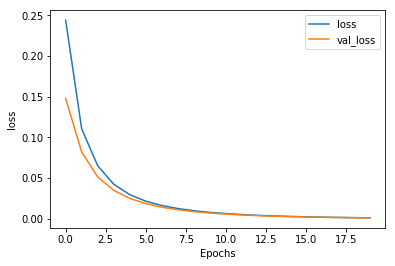

In [53]:
import matplotlib.pyplot as plt
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()


## 5.Predicting values from LSTM model 1 

In [54]:
Y_pred = model.predict([eyX_test, eeX_test])
Y_pred

array([[0.00110169],
       [0.00110169],
       [0.00110169],
       ...,
       [0.00110169],
       [0.00110169],
       [0.00110169]], dtype=float32)

## 6.Data preparation for LSTM model 2

In [55]:
dataXeeg2 = [[X[i+j] for i in range (10)] for j in range(14900)]  #eeg data seperation for in batches of 10
targetYeeg2 = [[labeledY[i] for i in range(10)]for i in range (14900)] 
dataXeye2 = [[Yarray[i] for i in range (10)] for j in range(14900)]  #eye data seperation for in batches of 10
targetYeye2 = [[labeledY[i] for i in range(10)]for i in range (14900)]

In [56]:
#convert all above data into array
DataXeeg2 = np.array(dataXeeg2, dtype = float)
TargetYeeg2 = np.array(targetYeeg2, dtype = int)
DataXeye2 = np.array(dataXeye2, dtype=int)
TargetYeye2 = np.array(targetYeye2, dtype=int)

In [57]:
DataXeye2.shape,DataXeeg2.shape,TargetYeye2.shape,TargetYeeg2.shape

((14900, 10, 1), (14900, 10, 14), (14900, 10), (14900, 10))

In [58]:
from sklearn.model_selection import train_test_split
#split eye state to train and test
eeX_train2, eeX_test2, eeY_train2,eeY_test2 = train_test_split(DataXeeg2, TargetYeeg2, test_size=0.20, shuffle=False)
#split eeg to train and test
eyX_train2, eyX_test2, eyY_train2,eyY_test2 = train_test_split(DataXeye2, TargetYeye2, test_size=0.20, shuffle=False)
#split eye train to train and validate
eeX_train2, eeX_valid2,eeY_train2, eeY_valid2 = train_test_split(eeX_train2, eeY_train2, test_size=0.10)
#split eeg to train and validate
eyX_train2, eyX_valid2,eyY_train2, eyY_valid2 = train_test_split(eyX_train2, eyY_train2, test_size=0.10)


print("data format of train test and validaton data set of eeg data")
print("EYE status data X",eeX_train2.shape, eeX_test2.shape, eeX_valid2.shape)
print("\ndata format of train test and validaton data set of eye data")
print("EEG data X",eyX_train2.shape, eyX_test2.shape, eyX_valid2.shape)
print("EEG data Y",eyY_train2.shape, eyY_test2.shape, eyY_valid2.shape)



data format of train test and validaton data set of eeg data
EYE status data X (10728, 10, 14) (2980, 10, 14) (1192, 10, 14)

data format of train test and validaton data set of eye data
EEG data X (10728, 10, 1) (2980, 10, 1) (1192, 10, 1)
EEG data Y (10728, 10) (2980, 10) (1192, 10)


## 7. Build algorothm and LSTM model 2 

In [59]:
eyeInput = Input(shape=(10,1),name='eyeInput')
eyeLSTM = LSTM(15,return_sequences=True)(eyeInput)
eyeDrop = Dropout(0.8)(eyeLSTM)
eyeLSTM_2 = LSTM(30)(eyeDrop)
eyeDrop_2 = Dropout(0.4)(eyeLSTM_2)

eegInput = Input(shape=(10,14),name='eegInput')
eegLSTM = LSTM(25,return_sequences=True)(eegInput)
eegDrop = Dropout(0.6)(eegLSTM)
eegLSTM_2 = LSTM(30)(eegDrop)
eegDrop_2 = Dropout(0.4)(eegLSTM_2)

eyeOutput = Dense(1, activation='tanh', name='eyeOut')(eyeDrop_2)
eegOutput = Dense(1, activation='tanh', name='eegOut')(eegDrop_2)

concIn = concatenate([eyeOutput,eegOutput],axis=1)
output = Dense(10,input_shape=(None,2),activation='sigmoid')(concIn)
model2 = Model(inputs=[eyeInput,eegInput],outputs=[output])

In [61]:
model2.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
results = model2.fit([eyX_train2, eeX_train2], [eyY_train2], validation_data=([eyX_valid2,eeX_valid2],eyY_valid2),
          epochs=20, batch_size=32)

Train on 10728 samples, validate on 1192 samples
Epoch 1/20
10728/10728 [==============================] - 16s 2ms/step - loss: 0.1682 - acc: 1.0000 - val_loss: 0.1130 - val_acc: 1.0000
Epoch 2/20
10728/10728 [==============================] - 9s 854us/step - loss: 0.0845 - acc: 1.0000 - val_loss: 0.0628 - val_acc: 1.0000
Epoch 3/20
10728/10728 [==============================] - 9s 817us/step - loss: 0.0499 - acc: 1.0000 - val_loss: 0.0395 - val_acc: 1.0000
Epoch 4/20
10728/10728 [==============================] - 9s 846us/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 5/20
10728/10728 [==============================] - 9s 829us/step - loss: 0.0228 - acc: 1.0000 - val_loss: 0.0193 - val_acc: 1.0000
Epoch 6/20
10728/10728 [==============================] - 9s 819us/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 7/20
10728/10728 [==============================] - 9s 852us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.0110 - va

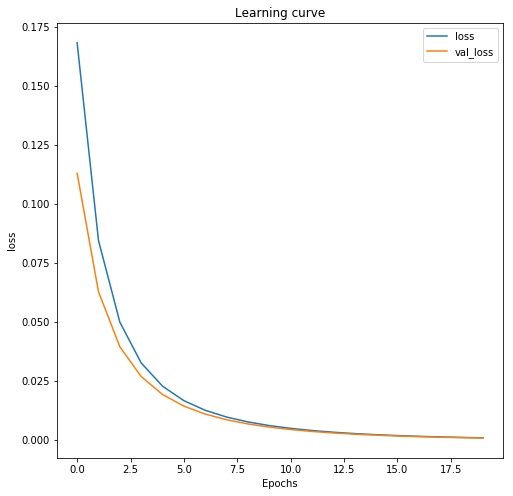

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

##  8.Predicting values from LSTM model 2

In [63]:
y_pred2 = model2.predict([eyX_train2, eeX_train2])
y_pred2


array([[0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ],
       [0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ],
       [0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ],
       ...,
       [0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ],
       [0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ],
       [0.00077082, 0.00041817, 0.0011461 , ..., 0.00138363, 0.00074211,
        0.0007936 ]], dtype=float32)